# Logistic Regression Using Python

This tutorial is for analysts to walk through a simple analysis workflow for social service data. It heavily borrows data and code from [another tutorial](http://blog.yhat.com/posts/logistic-regression-python-rodeo.html).

#### Learning Objectives
1. Import data
2. Explore data
3. Descriptive stats
4. Logistic regression

<br><br>
#### Import Python Packages

In [94]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from __future__ import division
from random import randint
import math

import pylab as pl
%matplotlib inline

In [73]:
## RESOURCES

# http://www.restore.ac.uk/srme/www/fac/soc/wie/research-new/srme/modules/mod4/5/

<br><br>
#### Read Data from CSV File

In [74]:
df = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")
sample = df.head(50)
sample

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


<br><br>
#### Relabel Columns

In [75]:
df.columns = ["admit", "gre", "gpa", "prestige"]
sample.columns = ["admit", "gre", "gpa", "prestige"]

<br><br>
#### Quick Descriptive Stats

In [76]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [77]:
df.std()

admit         0.466087
gre         115.516536
gpa           0.380567
prestige      0.944460
dtype: float64

<br><br>
#### Crosstabs

In [78]:
pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


<br><br>
#### Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0D503FB0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0D751CD0>]], dtype=object)

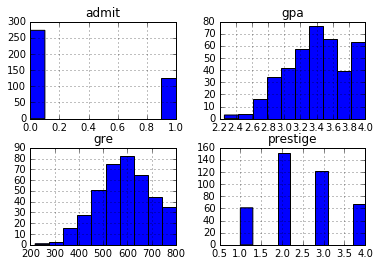

In [79]:
df.hist()

<br><br>
#### Dummy Variables

In [80]:
# dummify rank (aka "prestige")
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')

print("Dummified Prestige")
print(dummy_ranks.head())


# create a clean data frame for the regression
cols_to_keep = ["admit", "gre", "gpa"]

# join dummified rank with original data
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])

print("Dummified Prestige")
print(data.head())
#    admit  gre   gpa  prestige_2  prestige_3  prestige_4
# 0      0  380  3.61           0           1           0
# 1      1  660  3.67           0           1           0
# 2      1  800  4.00           0           0           0
# 3      1  640  3.19           0           0           1
# 4      0  520  2.93           0           0           1

# manually add the intercept
data['intercept'] = 1.0

Dummified Prestige
   prestige_1  prestige_2  prestige_3  prestige_4
0           0           0           1           0
1           0           0           1           0
2           1           0           0           0
3           0           0           0           1
4           0           0           0           1
Dummified Prestige
   admit  gre   gpa  prestige_2  prestige_3  prestige_4
0      0  380  3.61           0           1           0
1      1  660  3.67           0           1           0
2      1  800  4.00           0           0           0
3      1  640  3.19           0           0           1
4      0  520  2.93           0           0           1


<br><br>
#### Perform Regression

In [81]:
train_cols = data.columns[1:]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

logit = sm.Logit(data['admit'], data[train_cols])

# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


<br><br>
#### Regression Summary

In [82]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Tue, 25 Apr 2017   Pseudo R-squ.:                 0.08292
Time:                        10:11:46   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038         0.000     0.004
gpa            0.8040      0.332      2.423      0.015         0.154     1.454
prestige_2    -0.6754      0.316     -2.134      0.0

In this example, we're very confident that there is an inverse relationship between the probability of being admitted and the prestige of a candidate's undergraduate school.

In other words, the probability of being accepted into a graduate program is higher for students who attended a top ranked undergraduate college (`prestige_1==True`) as opposed to a lower ranked school with, say, `prestige_4==True` (remember, a prestige of 1 is the most prestigious and a prestige of 4 is the least prestigious.

In [83]:
# get p-values
result.pvalues

gre           0.038465
gpa           0.015388
prestige_2    0.032829
prestige_3    0.000104
prestige_4    0.000205
intercept     0.000465
dtype: float64

In [84]:
# get confidence intervals
result.conf_int()

,0,1
gre,0.000120,0.004409
gpa,0.153684,1.454391
prestige_2,-1.295751,-0.055135
prestige_3,-2.016992,-0.663416
prestige_4,-2.370399,-0.732529
intercept,-6.224242,-1.755716


<br><br>
#### Prediction

In [85]:
# dummify rank (aka "prestige")
dummy_ranks = pd.get_dummies(sample['prestige'], prefix='prestige')

print("Dummified Prestige")
print(dummy_ranks.head())


# create a clean data frame for the regression
cols_to_keep = ["admit", "gre", "gpa"]

# join dummified rank with original data
sample = sample[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])

print("Dummified Prestige")
print(sample.head())
#    admit  gre   gpa  prestige_2  prestige_3  prestige_4
# 0      0  380  3.61           0           1           0
# 1      1  660  3.67           0           1           0
# 2      1  800  4.00           0           0           0
# 3      1  640  3.19           0           0           1
# 4      0  520  2.93           0           0           1

# manually add the intercept
sample['intercept'] = 1.0

 # make predictions on the enumerated dataset
sample['log_odds'] = result.predict(sample[train_cols])
sample["odds_ratio"] = sample["log_odds"].apply(lambda ap: np.exp(ap))
sample["p"] = sample["odds_ratio"].apply(lambda odds: odds / (1 + odds))

print(sample["admit"].sum())

simulations = 10000

pr = sample["p"].tolist()
# admit_pred = data["admit_pred_mod"].tolist()

results = []

for sim in range(simulations):
    admits = 0
    for p in pr:
        threshold = int(round(p*100))
        draw = randint(0,101)
        # print(ap, threshold, draw)
        if threshold > draw:
            admits += 1
#     print(admits)
    results.append(admits)

print(sum(results)/len(results))
            
print(
    sample[sample["admit"]==1]["p"].min(),
    sample[sample["admit"]==0]["p"].max(),
)

Dummified Prestige
   prestige_1  prestige_2  prestige_3  prestige_4
0           0           0           1           0
1           0           0           1           0
2           1           0           0           0
3           0           0           0           1
4           0           0           0           1
Dummified Prestige
   admit  gre   gpa  prestige_2  prestige_3  prestige_4
0      0  380  3.61           0           1           0
1      1  660  3.67           0           1           0
2      1  800  4.00           0           0           0
3      1  640  3.19           0           0           1
4      0  520  2.93           0           0           1
22
28.3786
(0.52982148608350055, 0.63186538999776665)


In [88]:
 # make predictions on the enumerated dataset
data['log_odds'] = result.predict(data[train_cols])
data["odds_ratio"] = data["log_odds"].apply(lambda ap: np.exp(ap))
data["p"] = data["odds_ratio"].apply(lambda odds: odds / (1 + odds))

print(
    data["admit"].sum(),
    data["p"].sum(),
)

simulations = 10000

pr = data["p"].tolist()
# admit_pred = data["admit_pred_mod"].tolist()

results = []

for sim in range(simulations):
    admits = 0
    for p in pr:
        threshold = int(round(p*100))
        draw = randint(0,101)
        # print(ap, threshold, draw)
        if threshold > draw:
            admits += 1
#     print(admits)
    results.append(admits)

print(sum(results)/len(results))
            
print(
    data[data["admit"]==1]["p"].min(),
    data[data["admit"]==0]["p"].max(),
)

data.head(50)

127
226.6066
(0.52876973418837925, 0.67562156316838085)


,admit,gre,gpa,prestige_2,prestige_3,prestige_4,intercept,log_odds,odds_ratio,p
0,0,380,3.61,0,1,0,1.0,0.172627,1.188422,0.543050
1,1,660,3.67,0,1,0,1.0,0.292175,1.339337,0.572529
2,1,800,4.00,0,0,0,1.0,0.738408,2.092602,0.676648
3,1,640,3.19,0,0,1,1.0,0.178385,1.195285,0.544478
4,0,520,2.93,0,0,1,1.0,0.118354,1.125642,0.529554
5,1,760,3.00,1,0,0,1.0,0.369970,1.447691,0.591452
6,1,560,2.98,0,0,0,1.0,0.419246,1.520815,0.603303
7,0,400,3.08,1,0,0,1.0,0.217003,1.242348,0.554039
8,1,540,3.39,0,1,0,1.0,0.200735,1.222301,0.550016
9,0,700,3.92,1,0,0,1.0,0.517868,1.678446,0.626649


In [89]:
print(
    data["admit"].sum(),
    data["p"].sum(),
)

(127L, 231.30182050201)


In [93]:
p_success = 0.8
p_failure = (1-p_success)
odds_success = p_success / p_failure
odds_failure = p_failure / p_success
log_odds_success = math.log(odds_success)
log_odds_failure = math.log(odds_failure)

print(log_odds_success, log_odds_failure)

(1.3862943611198908, -1.3862943611198908)


In [95]:
# TODO
# SPLIT TRAIN vs TEST DATA

In [99]:
threshold = 0.5
while threshold < 1.0:
    admits = len(data[data["p"]>=threshold])
    if admits > 100 and admits < 150:
        print(threshold, admits)
    threshold += 0.001

(0.5870000000000001, 145)
(0.5880000000000001, 140)
(0.5890000000000001, 138)
(0.5900000000000001, 135)
(0.5910000000000001, 133)
(0.5920000000000001, 127)
(0.5930000000000001, 120)
(0.5940000000000001, 116)
(0.5950000000000001, 113)
(0.5960000000000001, 112)
(0.5970000000000001, 107)
(0.5980000000000001, 106)


In [101]:
data["forecast"] = data["p"].apply(lambda p: 1 if p >= 0.592 else 0)
data["forecast"].sum()

127L

In [103]:
data[["admit","log_odds","p","forecast"]].head()

,admit,log_odds,p,forecast
0,0,0.172627,0.543050,0
1,1,0.292175,0.572529,0
2,1,0.738408,0.676648,1
3,1,0.178385,0.544478,0
4,0,0.118354,0.529554,0


In [104]:
data["test"] = data["admit"]==data["forecast"]

In [109]:
print(
    len(data[data["test"]==True]),
    len(data[data["test"]==False]),
    len(data[data["test"]==True]) / len(data),
)

(280, 120, 0.7)
